# Geographic Weighted Regression (GWR)

In [1]:
import libpysal


OSError: Could not find lib geos_c.dll or load any of its variants [].

In [1]:
import geopandas

Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_auth.py
Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_calc.py
Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_edit.py
Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_fillnodata.py
Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_merge.py
Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_pansharpen.py
Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_polygonize.py
Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_proximity.py
Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_retile.py
Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_sieve.py
Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_auth.py
Missing global # gdal: DRIVER_NAME declaration in D:\OSGeo4W64\bin\gdal_calc.py
Missing globa

In [2]:
import mgwr as gw

ImportError: DLL load failed while importing lib: The specified procedure could not be found.

In [3]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import libpysal as ps

ImportError: DLL load failed while importing lib: The specified procedure could not be found.

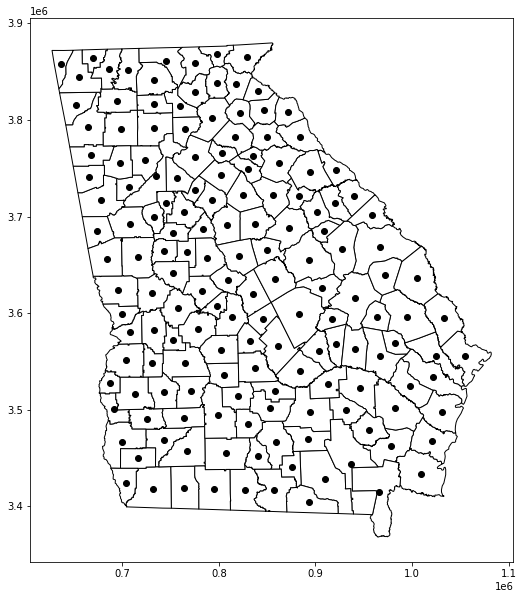

In [25]:
georgia = gp.read_file(ps.examples.get_path('G_utm.shp'))
fig, ax = plt.subplots(figsize = (10, 10))
georgia.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
georgia.centroid.plot(ax = ax, c = 'black')
plt.savefig('georgia_shp')

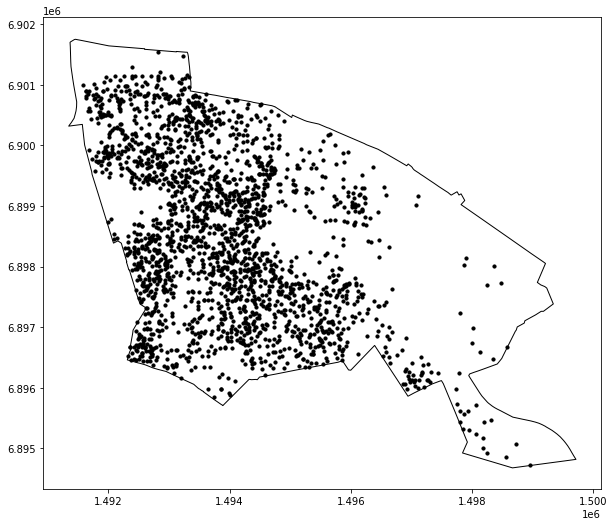

In [26]:
prenz = gp.read_file(ps.examples.get_path('prenzlauer.zip'))
prenz_bound = gp.read_file(ps.examples.get_path('prenz_bound.zip'))
fig, ax = plt.subplots(figsize = (10, 10))
prenz_bound.plot(ax = ax, **{'edgecolor': 'black', 'facecolor': 'white'})
prenz.plot(ax = ax, markersize = 10, **{'edgecolor': 'black','facecolor': 'black'})
plt.savefig('prenz')

### Data preparation

In [27]:
#Prepare Georgia dataset inputs
g_y = georgia['PctBach'].values.reshape((-1, 1))
g_X = georgia[['PctFB', 'PctBlack', 'PctRural']].values
u = georgia['X']
v = georgia['Y']
g_coords = list(zip(u, v))

#Prepare Berlin dataset inputs. Take the logarithm of the price variable to correct for skewing
b_y = np.log(prenz['price'].values.reshape((-1, 1)))
b_X = prenz[['review_sco','accommodat','bathrooms']].values
u = prenz['X']
v = prenz['Y']
b_coords = list(zip(u, v))

### Bandwith selection

In [28]:
#Examples of optimal bandwidth selection Instantiate bandwidth selection object
selector = Sel_BW(g_coords, g_y, g_X)

#Default golden section search using AICc criterion
bw = selector.search()
print(bw)

#Interval search using AICc criterion
bw = selector.search(search_method = 'interval',
interval = 2,
bw_min = 101,
bw_max = 150)
print(bw)

117.0
117


In [29]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search()
print(gwr_bw)

gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()
print(gwr_results.resid_ss)

117.0
1650.8596982770307


In [30]:
gwr_model = GWR(g_coords, g_y, g_X, 117)
gwr_results = gwr_model.fit()
print(gwr_results.resid_ss)

1650.8596982770307


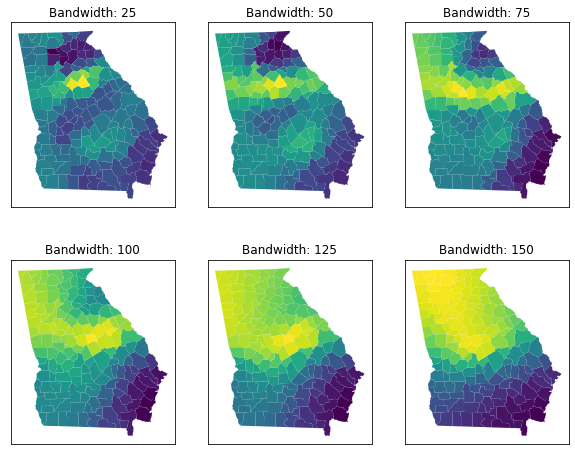

In [31]:
fig, ax = plt.subplots(2, 3, figsize = (10, 8))
bws = (x for x in range(25, 175, 25))

for row in range(2):
    for col in range(3):
        bw = next(bws)
        gwr_model = GWR(g_coords, g_y, g_X, bw)
        gwr_results = gwr_model.fit()
        georgia['rural'] = gwr_results.params[:, -1]
        georgia.plot('rural', ax = ax[row, col])
        ax[row,col].set_title('Bandwidth: ' + str(bw))
        ax[row,col].get_xaxis().set_visible(False)
        ax[row,col].get_yaxis().set_visible(False)
        plt.savefig('explore')

### Credits & Links

https://osf.io/bphw9/download